This Notebook containes the EDA part of the project [Churn Analysis](https://github.com/d0r1h/Churn-Analysis), for model building and basic statistical EDA go through this [notebook](https://www.kaggle.com/code/undersc0re/customer-churn)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder 

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = [12,6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/predict-the-churn-risk-rate/churn.csv', index_col=0)
data.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


There are two classes in the target feature **Customer will EXIT(1)** or **NOT(0)**, so we'll do analysis with respect to each class

#### **Categorical feature distribution**

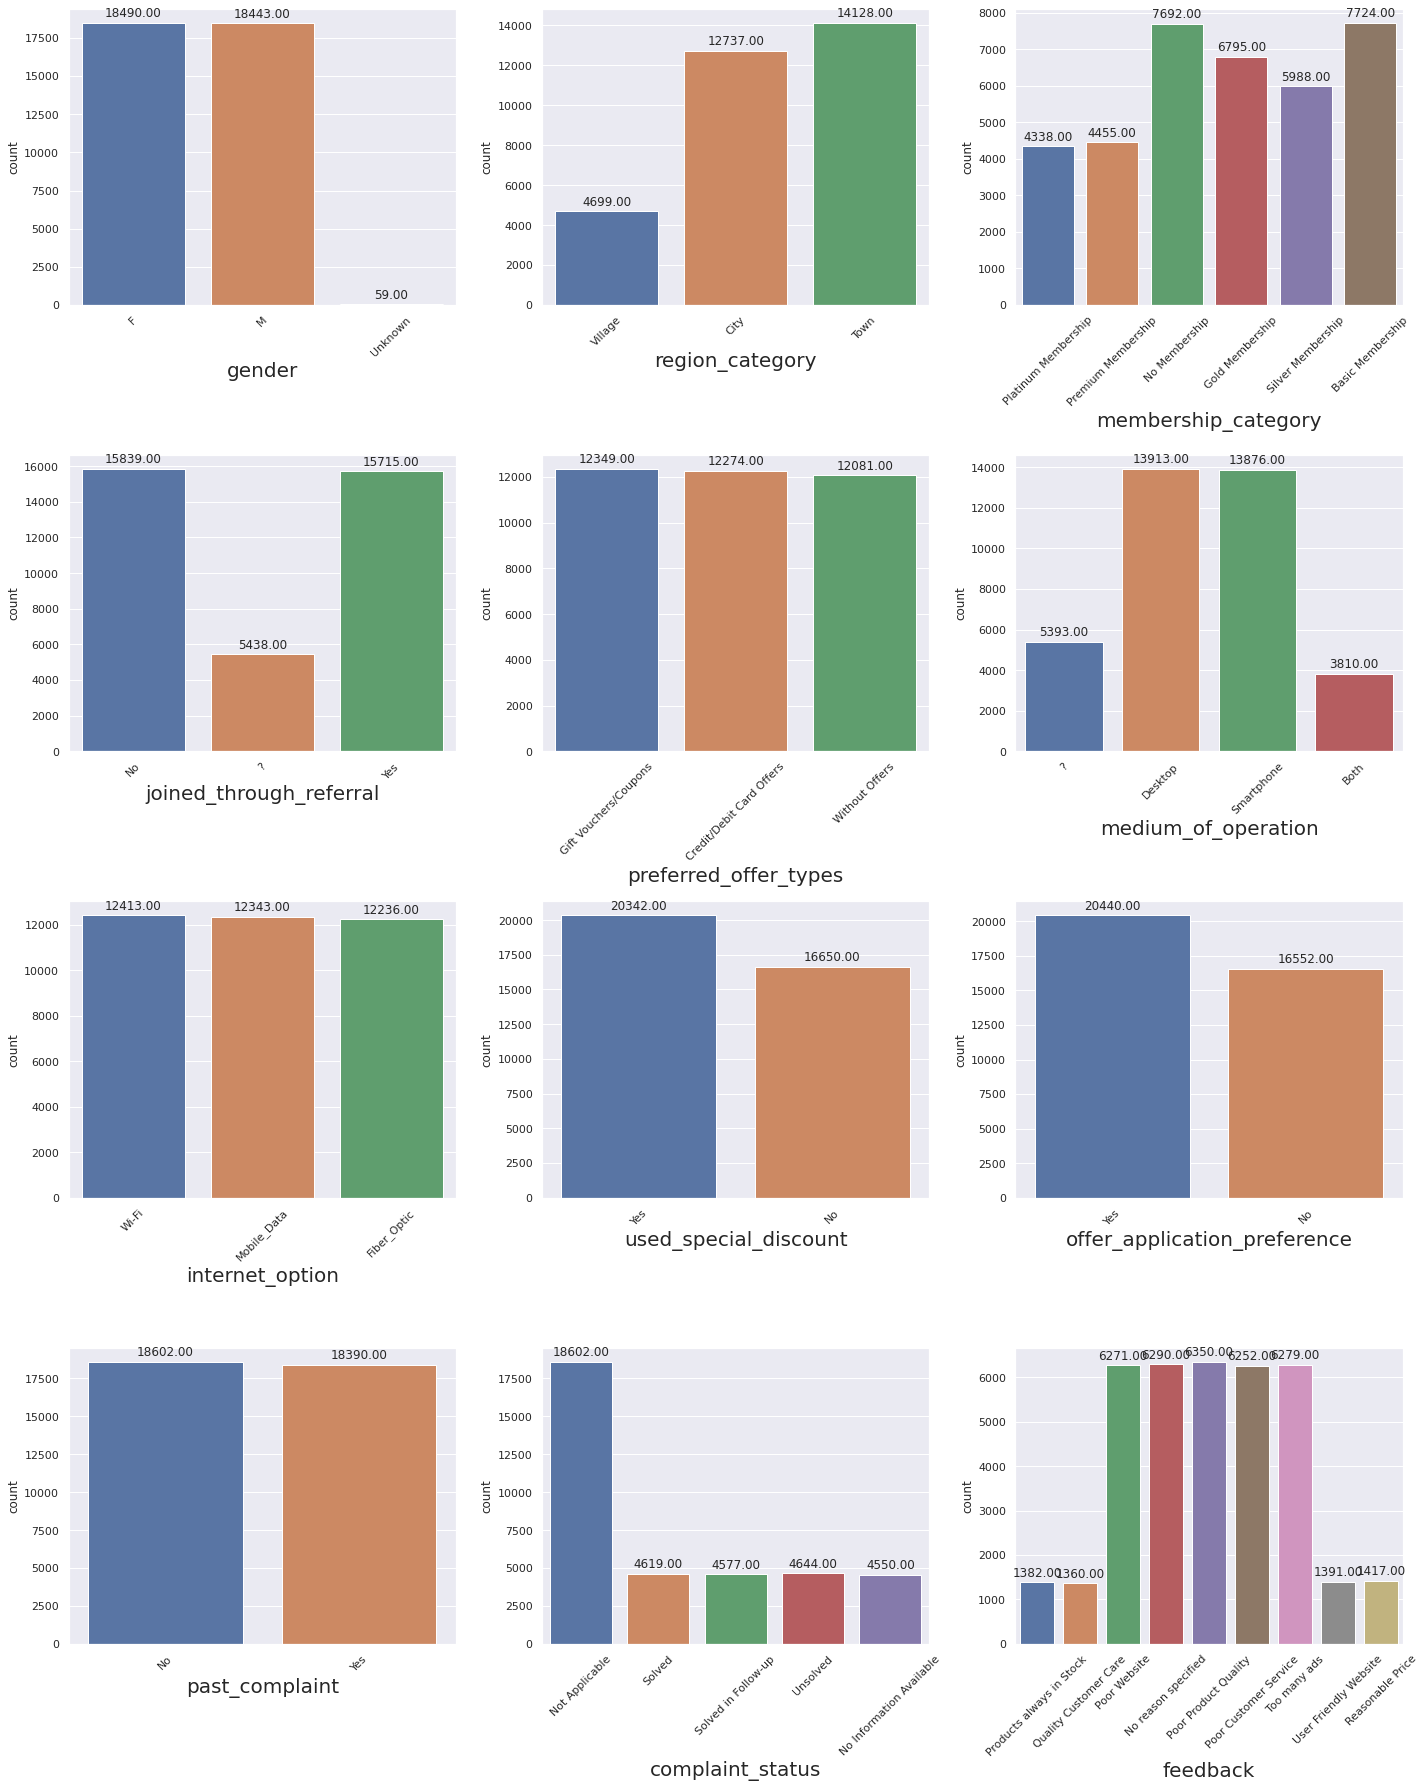

In [3]:
data_cat = data.drop(['referral_id','last_visit_time','avg_frequency_login_days','security_no','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 
for variable, subplot in zip(data_cat.columns,ax.flatten()):
    z = sns.countplot(x = data_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

1. As we can see both genders, Male and Female are equally distributed and there is some noise which will be handled in Section 5.1.2
2. Most of the customers are from town region while least number of customer belongs to village whcih is ~4600.
3. No & Basic category are leading one in membership_category while premium & platinum are least subscribed which is around ~4300+
4. Around 15K customers have joined through referral program
5. Most of the customers either use Desktop or Smartphone to access website
6. Most of the customers has given negative feedback about the service such as poor website, poor customer service etc.

#### **Continuous feature distribution**

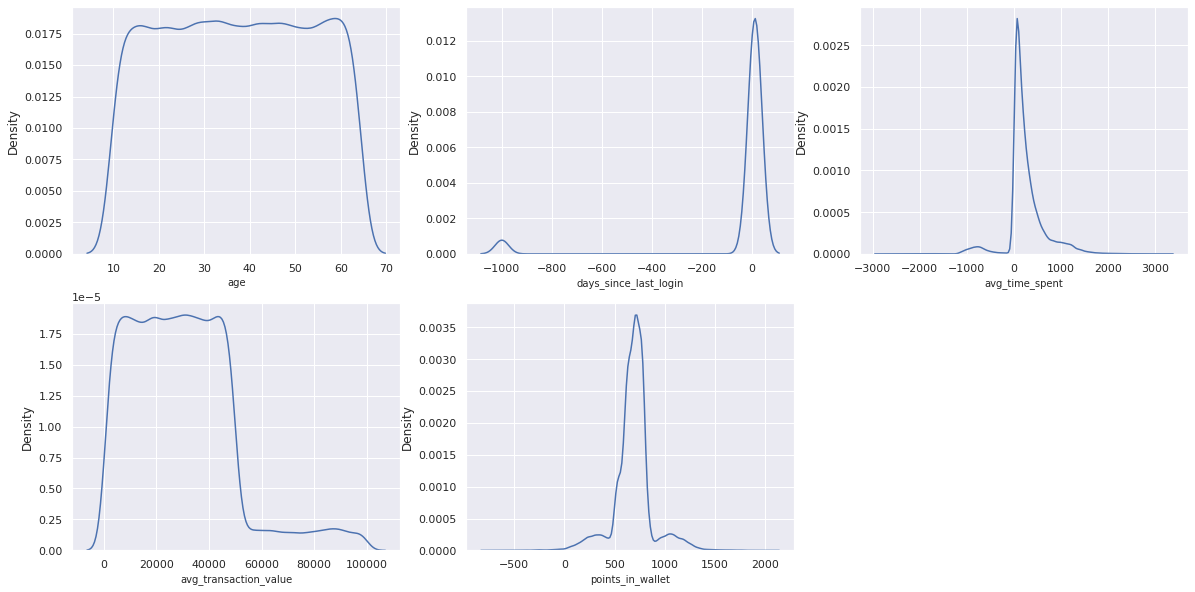

In [4]:
data_num=data.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number]) 
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10)) 
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

1. As we can see from plot independent feature days_since_last_login is highly left skewed
2. Features such as age and points_in_wallet are moderately left skewed

In [5]:
def CountPlot(xcolumn, xlabel, rotationangle=0):
    
    """
    Function for plotting classes dsitribution againest the target feature
    """
    
    ax = sns.countplot(x = xcolumn,
                      hue = 'churn_risk_score',
                      data = data)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',xytext = (0, 8), textcoords = 'offset points')
    plt.title(f"Churn rate by {xlabel}", fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.xticks(rotation=rotationangle)
    plt.show() 

#### **Churn rate by gender**

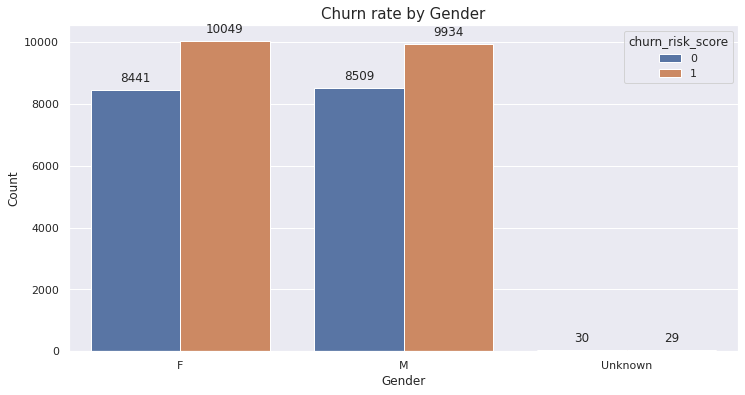

In [6]:
CountPlot("gender", "Gender")

#### **Churn rate by region_category**

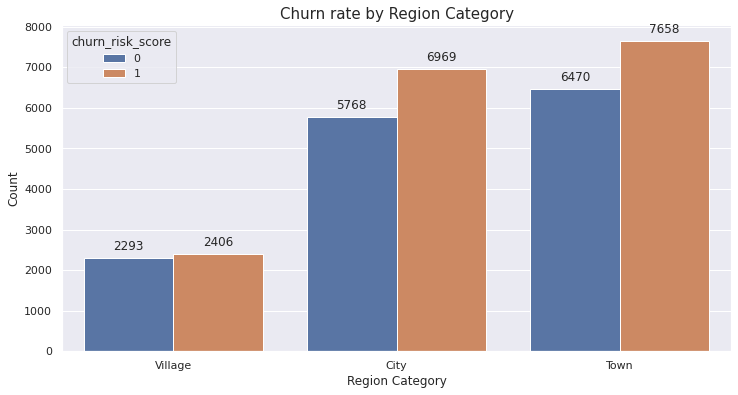

In [7]:
CountPlot("region_category", "Region Category")

#### **Churn rate by membership_category**

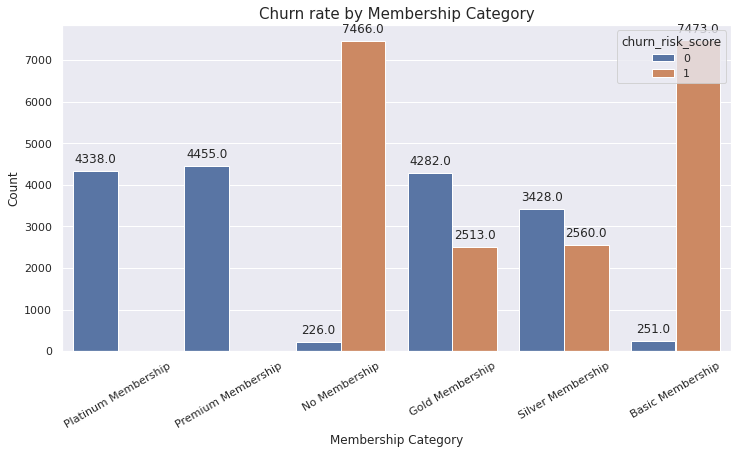

In [8]:
CountPlot("membership_category", "Membership Category", 30)

#### **Churn rate by joined_through_referral**

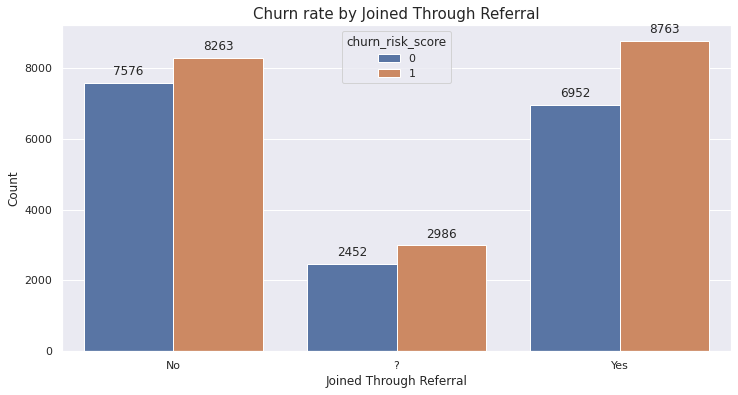

In [9]:
CountPlot("joined_through_referral", "Joined Through Referral")

#### **Churn rate by medium_of_operation**

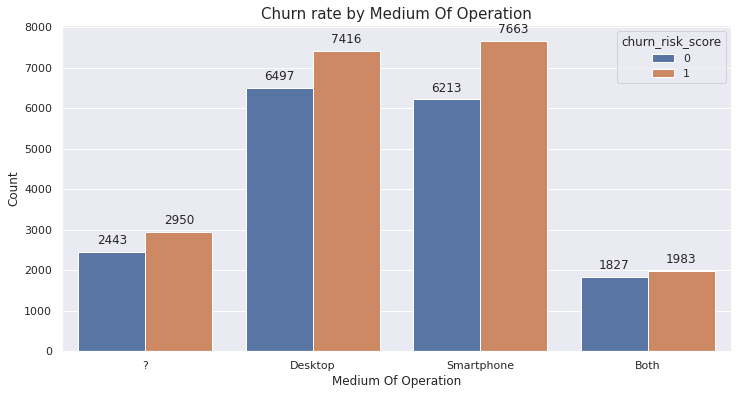

In [10]:
CountPlot("medium_of_operation", "Medium Of Operation")

#### **Churn rate by complaint_status**

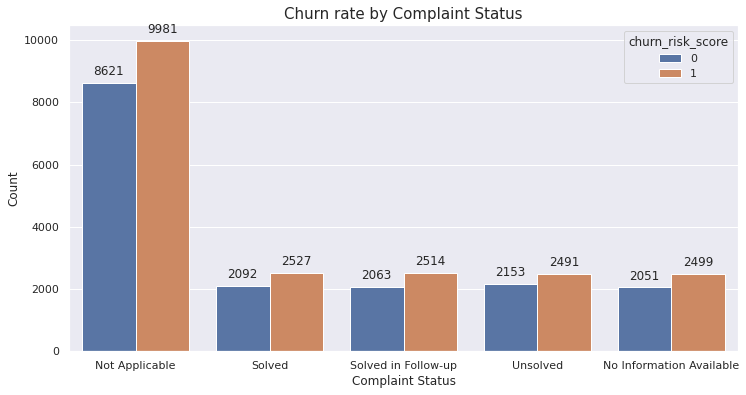

In [11]:
CountPlot("complaint_status", "Complaint Status")

#### **Churn rate by feedback**

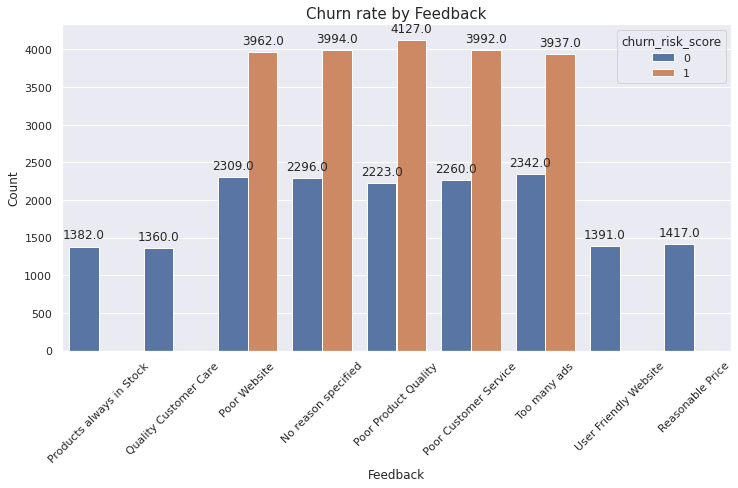

In [12]:
CountPlot("feedback", "Feedback", 45)

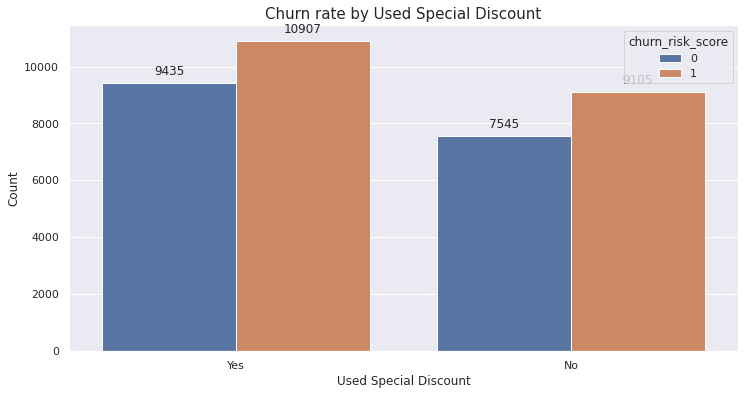

In [13]:
CountPlot("used_special_discount", "Used Special Discount")

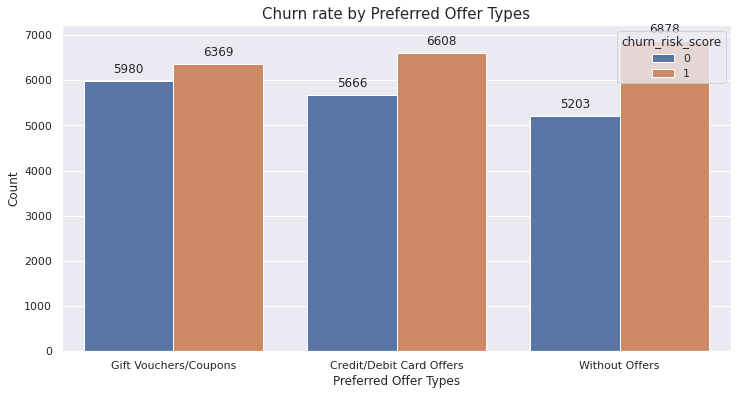

In [14]:
CountPlot("preferred_offer_types", "Preferred Offer Types")

1. Feamles are more likely to leave comparatively to men.
2. People with No or Basic membership are more likely to leave the service.
3. People who didn't have a good experience and gave negative feedbacks about the service are more likely to leave.

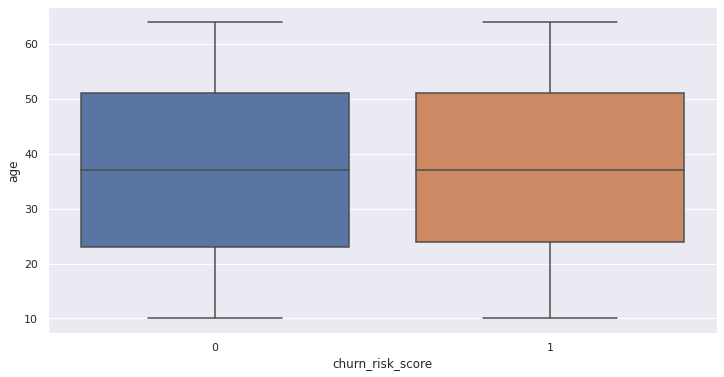

In [15]:
sns.boxplot(x=data["churn_risk_score"], y=data["age"]) 
plt.show()

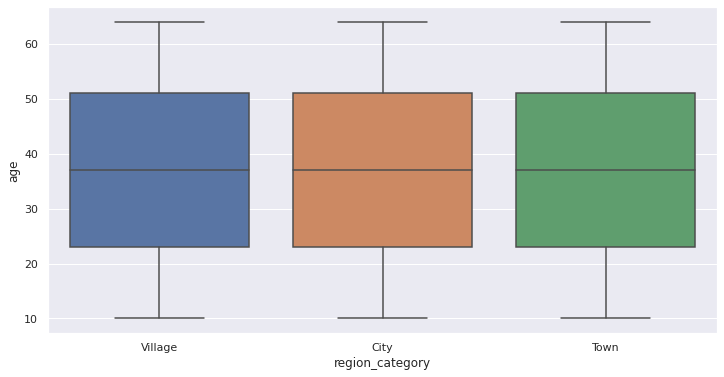

In [16]:
sns.boxplot(x=data["region_category"], y=data["age"]) 
plt.show()

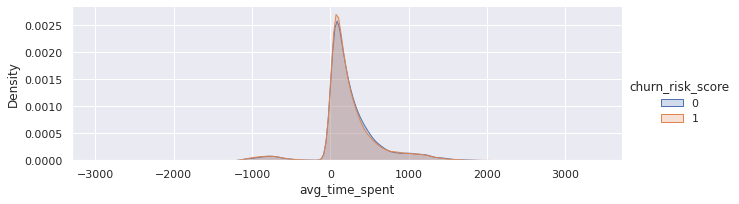

In [17]:
facet = sns.FacetGrid(data, hue = "churn_risk_score", aspect = 3)
facet.map(sns.kdeplot,"avg_time_spent",shade= True)
facet.add_legend()
plt.show()

#### **Correlation b/w Continuous feature & Target**

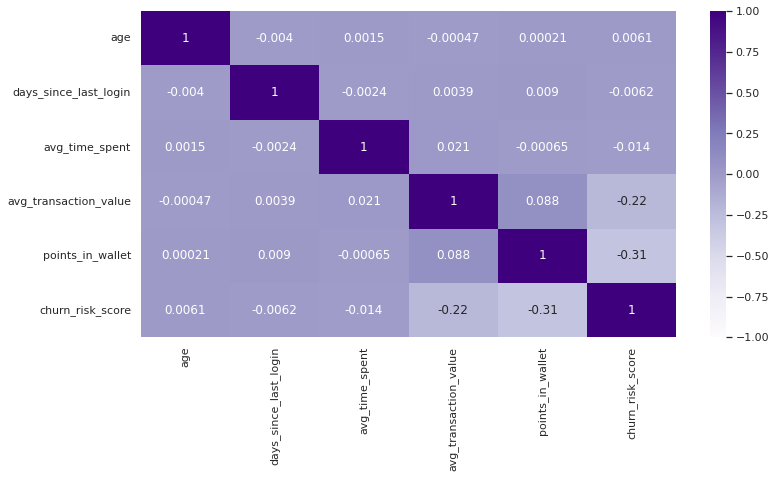

In [18]:
sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

#### **Correlation b/w categorical independent features & Target**

In [19]:
df = data[['churn_risk_score','gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback']]

In [20]:
df['joined_through_referral'] = df['joined_through_referral'].replace('?',np.NaN)
df['gender'] = df['gender'].replace('Unknown',np.NaN)
df['medium_of_operation'] = df['medium_of_operation'].replace('?',np.NaN)  

Missing_cat = df[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
for i,col in enumerate(Missing_cat):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable", "Unsolved","Solved","Solved in Follow-up"]])
orderencoding_region_category = OrdinalEncoder(categories = [["Village", "Town", "City"]])
orderencoding_preferred_offer_types = OrdinalEncoder(categories = [["Without Offers", "Gift Vouchers/Coupons", "Credit/Debit Card Offers"]])
orderencoding_medium_of_operation = OrdinalEncoder(categories = [["Smartphone", "Desktop", "Both"]])
orderencoding_feedback = OrdinalEncoder(categories = [["No reason specified", "Poor Product Quality", "Poor Website", "Poor Customer Service", "Too many ads","User Friendly Website", "Products always in Stock", "Reasonable Price","Quality Customer Care" ]])

df['membership_category'] = orderencoding_membership_category.fit_transform(df['membership_category'].values.reshape(-1,1))
df['complaint_status'] = orderencoding_complaint_status.fit_transform(df['complaint_status'].values.reshape(-1,1)) 
df['region_category'] = orderencoding_region_category.fit_transform(df['region_category'].values.reshape(-1,1)) 
df['preferred_offer_types'] = orderencoding_preferred_offer_types.fit_transform(df['preferred_offer_types'].values.reshape(-1,1)) 
df['medium_of_operation'] = orderencoding_medium_of_operation.fit_transform(df['medium_of_operation'].values.reshape(-1,1)) 
df['feedback'] = orderencoding_feedback.fit_transform(df['feedback'].values.reshape(-1,1)) 

In [22]:
dfdummy  = pd.get_dummies(df[['used_special_discount', 'joined_through_referral', 'gender', 'past_complaint', 'offer_application_preference']])
df.drop(['used_special_discount', 'joined_through_referral', 'gender', 'offer_application_preference','past_complaint'], axis=1, inplace=True)
DF = pd.concat([df, dfdummy], axis=1)

In [23]:
DF.head()

,churn_risk_score,region_category,membership_category,preferred_offer_types,medium_of_operation,complaint_status,feedback,used_special_discount_No,used_special_discount_Yes,joined_through_referral_No,joined_through_referral_Yes,gender_F,gender_M,past_complaint_No,past_complaint_Yes,offer_application_preference_No,offer_application_preference_Yes
0,0,0.0,4.0,1.0,1.0,1.0,6.0,0,1,1,0,1,0,1,0,0,1
1,0,2.0,5.0,1.0,1.0,3.0,8.0,0,1,1,0,1,0,0,1,1,0
2,1,1.0,0.0,1.0,1.0,4.0,2.0,1,0,0,1,1,0,0,1,0,1
3,1,2.0,0.0,1.0,1.0,2.0,2.0,1,0,0,1,0,1,0,1,0,1
4,1,2.0,0.0,2.0,0.0,3.0,2.0,1,0,1,0,1,0,0,1,0,1


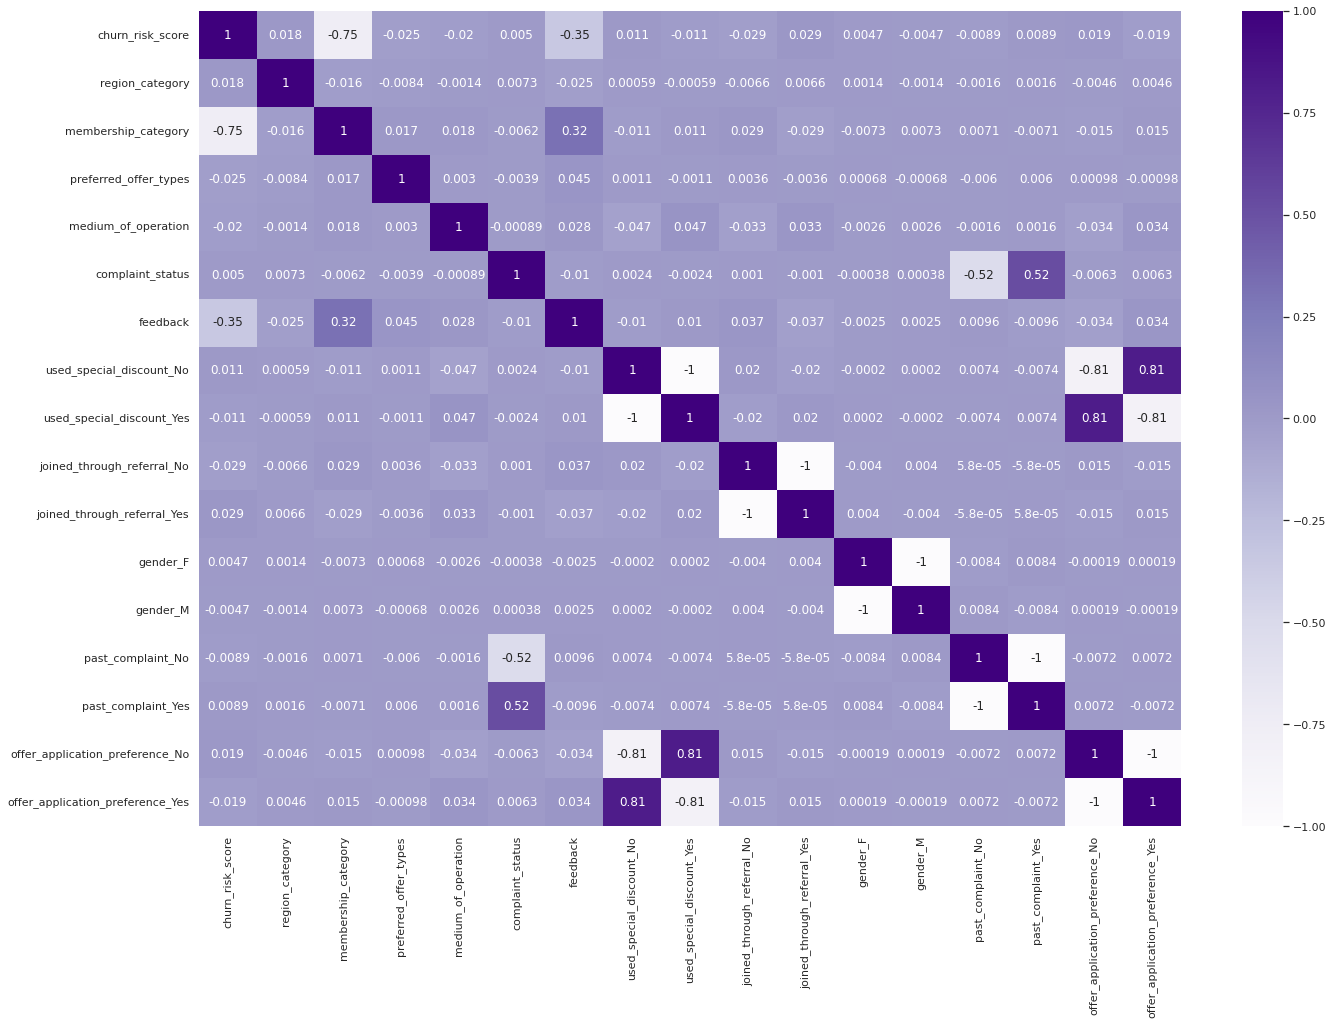

In [24]:
plt.rcParams['figure.figsize'] = [22,15]
sns.heatmap(DF.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

**membership_category** and **feedback** are negative correlated with churn_risk_score -0.75, -0.35 respectively.